In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pyspark.sql import SparkSession

In [2]:
spark = SparkSession.builder.appName("PysparkExample") \
 .config("spark.some.config.option", "some-value") \
 .getOrCreate()


In [4]:
df = spark.read.csv("Vermont_Vendor_Payments.csv",
 header="true", inferSchema=True)
df

DataFrame[Quarter Ending: string, Department: string, UnitNo: int, Vendor Number: string, Vendor: string, City: string, State: string, DeptID Description: string, DeptID: string, Amount: string, Account: string, AcctNo: string, Fund Description: string, Fund: string]

In [5]:
# Modificamos la columna de amount a decimal:
df = df.withColumn("Amount", df["Amount"].cast("double"))
df

DataFrame[Quarter Ending: string, Department: string, UnitNo: int, Vendor Number: string, Vendor: string, City: string, State: string, DeptID Description: string, DeptID: string, Amount: double, Account: string, AcctNo: string, Fund Description: string, Fund: string]

In [6]:
columns = df.columns
print("The column Names are:")
for i in columns:
 print(i)


The column Names are:
Quarter Ending
Department
UnitNo
Vendor Number
Vendor
City
State
DeptID Description
DeptID
Amount
Account
AcctNo
Fund Description
Fund


In [7]:
print("The total number of rows is:", df.count(),
 "\nThe total number columns is:", len(df.columns))


The total number of rows is: 1988180 
The total number columns is: 14


In [8]:

# Visualización de las primeras filas del df:
df.show(5)


+--------------+--------------------+------+-------------+--------------------+-----------+-----+-------------------+----------+------+--------------------+------+--------------------+-----+
|Quarter Ending|          Department|UnitNo|Vendor Number|              Vendor|       City|State| DeptID Description|    DeptID|Amount|             Account|AcctNo|    Fund Description| Fund|
+--------------+--------------------+------+-------------+--------------------+-----------+-----+-------------------+----------+------+--------------------+------+--------------------+-----+
|    12/31/2019|Vt Housing & Cons...|  9150|   0000002188|Vermont Housing &...| Montpelier|   VT|              Trust|9150120000|  null|Transfer Out - Co...|720010|Housing & Conserv...|90610|
|    12/31/2019|Vt Housing & Cons...|  9150|   0000375660|Wagner Developmen...|Brattleboro|   VT|            VT REDI|9150293000|  null|Other Direct Gran...|552990|Housing & Conserv...|90610|
|    12/31/2019|Vt Housing & Cons...|  9150| 

In [9]:
# Con head nos muestra la primera línea:
df.head()

Row(Quarter Ending='12/31/2019', Department='Vt Housing & Conserv Board', UnitNo=9150, Vendor Number='0000002188', Vendor='Vermont Housing & Conservation Board', City='Montpelier', State='VT', DeptID Description='Trust', DeptID='9150120000', Amount=None, Account='Transfer Out - Component Units', AcctNo='720010', Fund Description='Housing & Conserv Trust Fund', Fund='90610')

In [10]:

df.describe().show()


+-------+--------------+--------------------+------------------+------------------+--------------------+--------+------------------+------------------+--------------------+--------------------+--------------------+------------------+--------------------+--------------------+
|summary|Quarter Ending|          Department|            UnitNo|     Vendor Number|              Vendor|    City|             State|DeptID Description|              DeptID|              Amount|             Account|            AcctNo|    Fund Description|                Fund|
+-------+--------------+--------------------+------------------+------------------+--------------------+--------+------------------+------------------+--------------------+--------------------+--------------------+------------------+--------------------+--------------------+
|  count|       1988180|             1988180|           1988180|           1988180|             1988180| 1242358|           1988132|           1987643|             1988180|

**Mostrar información**

    SQL


In [11]:
df.createOrReplaceTempView("VermontVendor")
spark.sql(
'''
SELECT `Quarter Ending`, Department, Amount, State FROM VermontVendor
LIMIT 10
'''
).show()

+--------------+--------------------+------+-----+
|Quarter Ending|          Department|Amount|State|
+--------------+--------------------+------+-----+
|    12/31/2019|Vt Housing & Cons...|  null|   VT|
|    12/31/2019|Vt Housing & Cons...|  null|   VT|
|    12/31/2019|Vt Housing & Cons...|  null|   VT|
|    12/31/2019|Vt Housing & Cons...|  null|   VT|
|    12/31/2019|Vt Housing & Cons...|  null|   VT|
|    12/31/2019|Vt Housing & Cons...|  null|   VT|
|    12/31/2019|Vt Housing & Cons...|  null|   VT|
|    12/31/2019|Vt Housing & Cons...|  null|   VT|
|    12/31/2019|Vt Housing & Cons...|  null|   VT|
|    12/31/2019|Vt Housing & Cons...|  null|   VT|
+--------------+--------------------+------+-----+



    Spark


In [13]:
df.select("Quarter Ending", "Department", "Amount", "State").show(10)


+--------------+--------------------+------+-----+
|Quarter Ending|          Department|Amount|State|
+--------------+--------------------+------+-----+
|    12/31/2019|Vt Housing & Cons...|  null|   VT|
|    12/31/2019|Vt Housing & Cons...|  null|   VT|
|    12/31/2019|Vt Housing & Cons...|  null|   VT|
|    12/31/2019|Vt Housing & Cons...|  null|   VT|
|    12/31/2019|Vt Housing & Cons...|  null|   VT|
|    12/31/2019|Vt Housing & Cons...|  null|   VT|
|    12/31/2019|Vt Housing & Cons...|  null|   VT|
|    12/31/2019|Vt Housing & Cons...|  null|   VT|
|    12/31/2019|Vt Housing & Cons...|  null|   VT|
|    12/31/2019|Vt Housing & Cons...|  null|   VT|
+--------------+--------------------+------+-----+
only showing top 10 rows



## 2º Ejemplo ##

In [14]:
spark.sql(
'''
SELECT `Quarter Ending`, Department, Amount, State FROM VermontVendor
WHERE Department = 'Education'
LIMIT 10
'''
).show()


+--------------+----------+------+-----+
|Quarter Ending|Department|Amount|State|
+--------------+----------+------+-----+
|    12/31/2012| Education|302.12|   VT|
|    12/31/2012| Education|  null|   VT|
|    12/31/2012| Education|  null|   VT|
|    12/31/2012| Education|  null|   VT|
|    12/31/2012| Education|  null|   VT|
|    12/31/2012| Education|  null|   VT|
|    12/31/2012| Education| 646.5|   VT|
|    12/31/2012| Education|  29.9|   VT|
|    12/31/2012| Education|  null|   VT|
|    12/31/2012| Education|  null|   VT|
+--------------+----------+------+-----+



In [15]:
df.select("Quarter Ending", "Department", "Amount", "State") \
 .filter(df["Department"] == "Education").show(10)

+--------------+----------+------+-----+
|Quarter Ending|Department|Amount|State|
+--------------+----------+------+-----+
|    12/31/2012| Education|302.12|   VT|
|    12/31/2012| Education|  null|   VT|
|    12/31/2012| Education|  null|   VT|
|    12/31/2012| Education|  null|   VT|
|    12/31/2012| Education|  null|   VT|
|    12/31/2012| Education|  null|   VT|
|    12/31/2012| Education| 646.5|   VT|
|    12/31/2012| Education|  29.9|   VT|
|    12/31/2012| Education|  null|   VT|
|    12/31/2012| Education|  null|   VT|
+--------------+----------+------+-----+
only showing top 10 rows



## Visualización ##


In [16]:
plot_df = spark.sql(
'''
SELECT Department, SUM(Amount) as Total FROM VermontVendor
GROUP BY Department
ORDER BY Total DESC
LIMIT 10
'''
).toPandas()
plot_df


,Department,Total
0,Buildings & Gen Serv-Prop,2.727510e+11
1,Natural Res Central Office,6.100636e+09
2,Children and Families,2.763515e+07
3,Transportation Agency,1.841478e+07
4,Children and Family Services,1.713222e+07
5,Corrections,1.494189e+07
6,Judiciary,1.240615e+07
7,Health,1.126880e+07
8,Public Safety,1.119945e+07
9,Agency of Transportation,9.447466e+06


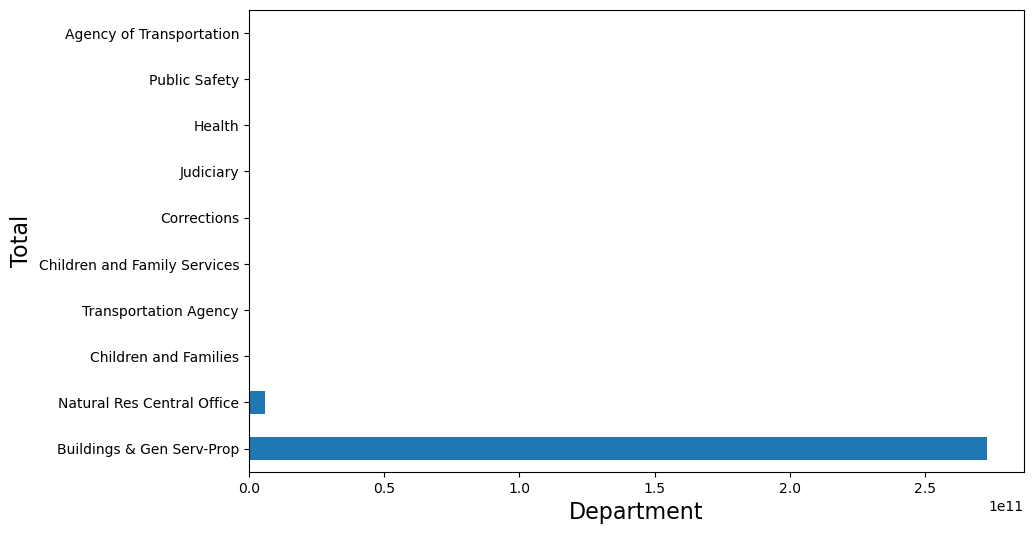

In [17]:
fig, ax = plt.subplots(1,1, figsize=(10,6))
plot_df.plot(x='Department', y='Total',
 kind='barh', color='C0',
 ax=ax, legend=False)
ax.set_xlabel("Department", size=16)
ax.set_ylabel("Total", size=16)
plt.savefig("barplot.png")
plt.show()


In [18]:
import seaborn as sns

In [19]:
plot_df2 = spark.sql(
'''
SELECT Department, SUM(Amount) as Total FROM VermontVendor
GROUP BY Department
'''
).toPandas()
plot_df


,Department,Total
0,Buildings & Gen Serv-Prop,2.727510e+11
1,Natural Res Central Office,6.100636e+09
2,Children and Families,2.763515e+07
3,Transportation Agency,1.841478e+07
4,Children and Family Services,1.713222e+07
5,Corrections,1.494189e+07
6,Judiciary,1.240615e+07
7,Health,1.126880e+07
8,Public Safety,1.119945e+07
9,Agency of Transportation,9.447466e+06


/tmp/ipykernel_212/2621704109.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(plot_df2["Total"]))


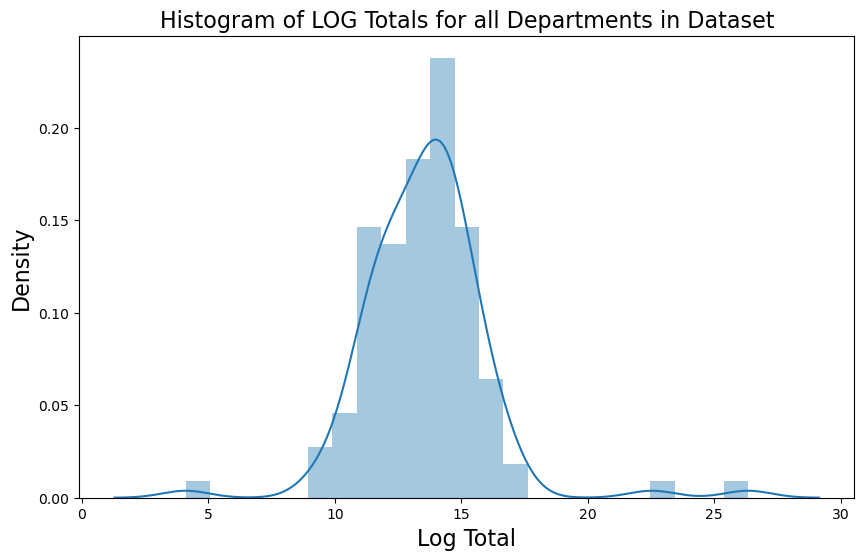

In [20]:

plt.figure(figsize=(10,6))
sns.distplot(np.log(plot_df2["Total"]))
plt.title("Histogram of LOG Totals for all Departments in Dataset",
 size=16)
plt.ylabel("Density", size=16)
plt.xlabel("Log Total", size=16)
plt.savefig("distplot.png")
plt.show()
